In [12]:
%pip install opencv-python
%pip install matplotlib
%pip install pandas

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

# Crear carpeta de resultados
if not os.path.exists("resultados"):
    os.makedirs("resultados")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# ===============================
# 1. Generar la imagen del Icoságono
# ===============================

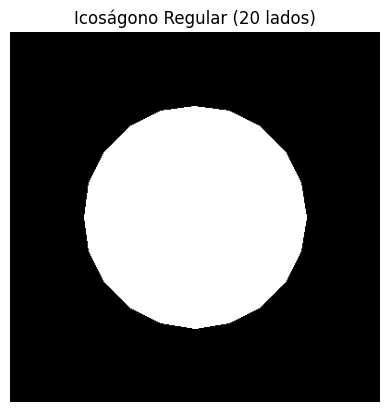

True

In [16]:
def crear_icosagono(lados=20, radio=120, img_size=400):
    img = np.zeros((img_size, img_size), dtype=np.uint8)  # Fondo negro
    centro = (img_size // 2, img_size // 2)

    # Calcular vértices
    angulo = 2 * np.pi / lados
    vertices = [
        (int(centro[0] + radio * np.cos(i * angulo)),
         int(centro[1] + radio * np.sin(i * angulo)))
        for i in range(lados)
    ]

    # Dibujar el polígono relleno
    pts = np.array(vertices, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], 255)

    return img, vertices

icosagono, vertices = crear_icosagono()

plt.imshow(icosagono, cmap="gray")
plt.title("Icoságono Regular (20 lados)")
plt.axis("off")
plt.show()

cv2.imwrite("resultados/icosagono.png", icosagono)

# ===============================
# 2. Preprocesamiento (Operaciones Morfológicas)
# ===============================

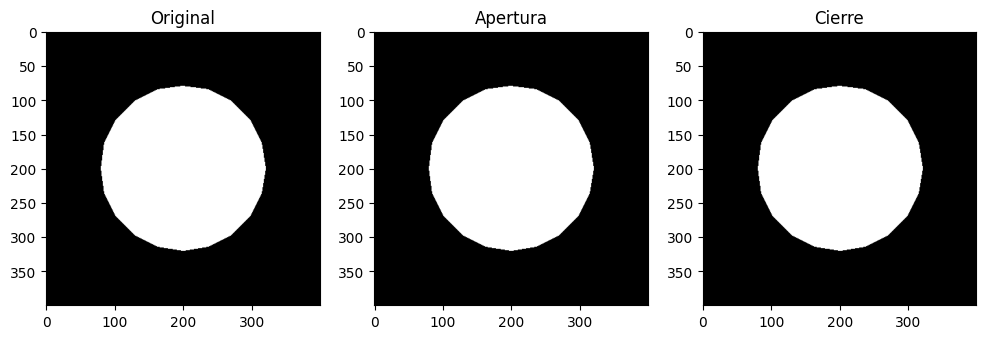

True

In [14]:
kernel = np.ones((5,5), np.uint8)

# Apertura (eliminar ruido)
apertura = cv2.morphologyEx(icosagono, cv2.MORPH_OPEN, kernel)

# Cierre (rellenar huecos)
cierre = cv2.morphologyEx(icosagono, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1), plt.imshow(icosagono, cmap="gray"), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(apertura, cmap="gray"), plt.title("Apertura")
plt.subplot(1,3,3), plt.imshow(cierre, cmap="gray"), plt.title("Cierre")
plt.show()

cv2.imwrite("resultados/apertura.png", apertura)
cv2.imwrite("resultados/cierre.png", cierre)

# ===============================
# 3. Extracción de Características Geométricas
# ===============================

In [18]:
%pip install openpyxl

contornos, _ = cv2.findContours(cierre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas, perimetros, circularidad = [], [], []

for cnt in contornos:
    area = cv2.contourArea(cnt)
    perimetro = cv2.arcLength(cnt, True)
    circ = (4*np.pi*area)/(perimetro**2)  # Circularidad
    areas.append(area)
    perimetros.append(perimetro)
    circularidad.append(circ)

# Guardar resultados en Excel
df = pd.DataFrame({
    "Figura": ["Icoságono Regular (20 lados)"],
    "Área (px^2)": areas,
    "Perímetro (px)": perimetros,
    "Circularidad": circularidad
})
df.to_excel("resultados/medidas.xlsx", index=False)
print(df)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                         Figura  Área (px^2)  Perímetro (px)  Circularidad
0  Icoságono Regular (20 lados)      44737.0      791.293496      0.897845


# ===============================
# 4. Comparación con Fórmulas Matemáticas
# ===============================

In [19]:
def area_icosagono(lado):
    return 5 * lado**2 * math.tan(math.pi/20)

def perimetro_icosagono(lado):
    return 20 * lado

# Calcular lado aproximado entre dos vértices
lado_aprox = math.dist(vertices[0], vertices[1])

area_teorica = area_icosagono(lado_aprox)
perimetro_teorico = perimetro_icosagono(lado_aprox)

print(f"Área teórica: {area_teorica:.2f} px^2")
print(f"Perímetro teórico: {perimetro_teorico:.2f} px")

Área teórica: 1112.65 px^2
Perímetro teórico: 749.67 px
